### 0) Utils

In [1]:
import pandas as pd
import numpy as np
import re
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
def load_metrics_from_txt(file_path):

    data_dict = dict()

    with open(file_path, 'r') as file:
        
        for line in file:

            line = line.strip()
            
            metric_name = re.search(r'(?i)^([a-z\_]+)', line)[0]
            metric_value = float(re.search(r'(\d+\.\d+)', line)[0])

            data_dict[metric_name] = metric_value

    return data_dict

In [3]:
def create_bar_plot(metric_mean_name, metric_std_name,
                    xlabel, ylabel, title):

    global data_dict

    # Sample data
    categories = [key for key in data_dict.keys()]
    values = [data_dict[key][metric_mean_name] for key in data_dict.keys()]
    std_devs = [data_dict[key][metric_std_name] for key in data_dict.keys()]

    # Create bar plot
    plt.figure(figsize=(6,4))

    plt.bar(categories, values, yerr=std_devs, capsize=5)

    # Add values on top of each bar
    for i in range(len(categories)):
        plt.text(i + 0.25, values[i], f'{values[i]:.2f}', ha='center')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [4]:
def create_grouped_bar_plot(metric_mean_names, metric_std_names,
                            xlabel, ylabel, title,
                            colormap='Spectral'):

    global data_dict

    num_metrics = len(metric_mean_names)

    # Prepare data
    categories = [key for key in data_dict.keys()]
    bar_width = 0.27  # Width of each bar

    # Set up subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Calculate the width for each group
    total_bar_width = bar_width * num_metrics
    bar_positions = np.arange(len(categories))  # x-axis locations for the groups

    cmap = get_cmap(colormap)
    colors = [cmap(i) for i in np.linspace(0.3, 0.9, num_metrics)]  # Get colors from the colormap


    for i in range(num_metrics):
        metric_values = [data_dict[key][metric_mean_names[i]] for key in data_dict.keys()]
        metric_std_devs = [data_dict[key][metric_std_names[i]] for key in data_dict.keys()]

        # Shift the x position for each group
        x_pos = [pos + i * bar_width - total_bar_width / 2 for pos in bar_positions]

        # Create bars
        bars = ax.bar(x_pos, metric_values, bar_width, label=['Train', 'Dev', 'Test'][i], yerr=metric_std_devs,
                      capsize=5, color=colors[i])

        # Add values on top of each bar
        for j, bar in enumerate(bars):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{metric_values[j]:.2f}', ha='center')

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def create_grouped_bar_plot_relative_improvement(metric_mean_names,
                            xlabel, ylabel, title,
                            colormap='Spectral'):

    global data_dict

    num_metrics = len(metric_mean_names)

    # Prepare data
    categories = [key for key in data_dict.keys() if 'text_only' not in key]
    bar_width = 0.27  # Width of each bar

    # Set up subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Calculate the width for each group
    total_bar_width = bar_width * num_metrics
    bar_positions = np.arange(len(categories))  # x-axis locations for the groups

    cmap = get_cmap(colormap)
    colors = [cmap(i) for i in np.linspace(0.3, 0.9, num_metrics)]  # Get colors from the colormap


    for i in range(num_metrics):
        metric_values = [data_dict[key][metric_mean_names[i]] for key in data_dict.keys() if 'text_only' not in key]

        # Shift the x position for each group
        x_pos = [pos + i * bar_width - total_bar_width / 2 for pos in bar_positions]

        # Create bars
        bars = ax.bar(x_pos, metric_values, bar_width, label=['Train', 'Dev', 'Test'][i],
                      capsize=5, color=colors[i])

        # Add values on top of each bar
        for j, bar in enumerate(bars):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{metric_values[j]:.2f}', ha='center')

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.tight_layout()
    plt.show()

### 1) Load data

In [6]:
data_dict = dict()

data_dict['correct_transcript_text_only'] = load_metrics_from_txt('text_only_output.txt')
data_dict['wav2vec2'] = load_metrics_from_txt('wav2vec2_output.txt')
data_dict['hubert'] = load_metrics_from_txt('hubert_output.txt')
data_dict['uniSpeechSat'] = load_metrics_from_txt('uniSpeechSat_output.txt')

### 2) Loss

#### 2.1) Absolute values

C:\Users\danie\AppData\Local\Temp\ipykernel_20168\1910469201.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap)


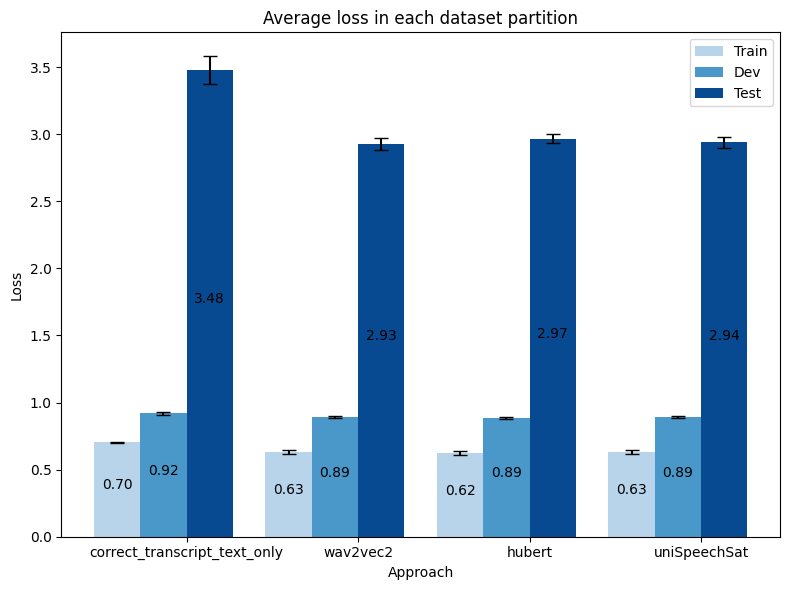

In [7]:
create_grouped_bar_plot(['mean_train_loss', 'mean_dev_loss', 'mean_test_loss'],
                        ['std_train_loss', 'std_dev_loss', 'std_test_loss'],
                        'Approach', 'Loss', 'Average loss in each dataset partition',
                        colormap='Blues')

### 3) Accuracy

#### 3.1) Absolute values

C:\Users\danie\AppData\Local\Temp\ipykernel_20168\1910469201.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap)


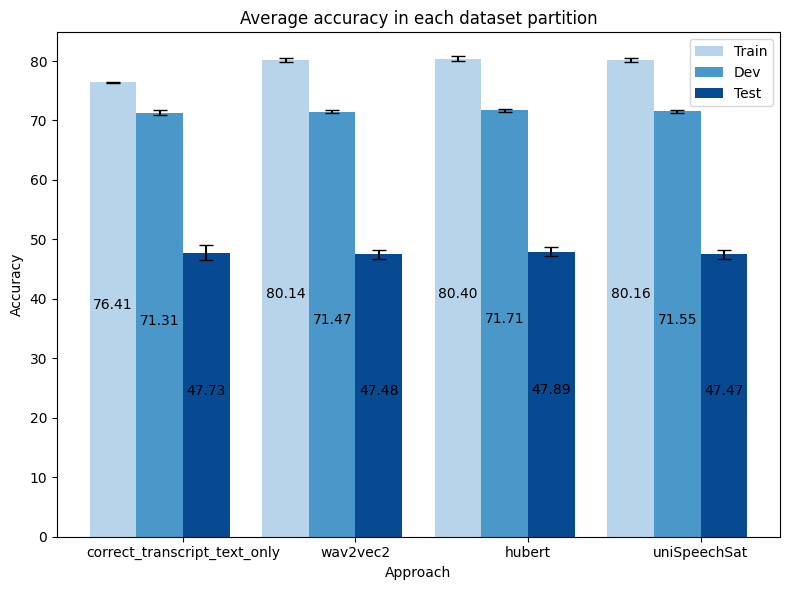

In [8]:
create_grouped_bar_plot(['mean_train_accuracy', 'mean_dev_accuracy', 'mean_test_accuracy'],
                        ['std_train_accuracy', 'std_dev_accuracy', 'std_test_accuracy'],
                        'Approach', 'Accuracy', 'Average accuracy in each dataset partition',
                        colormap='Blues')

C:\Users\danie\AppData\Local\Temp\ipykernel_20168\213888199.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap)


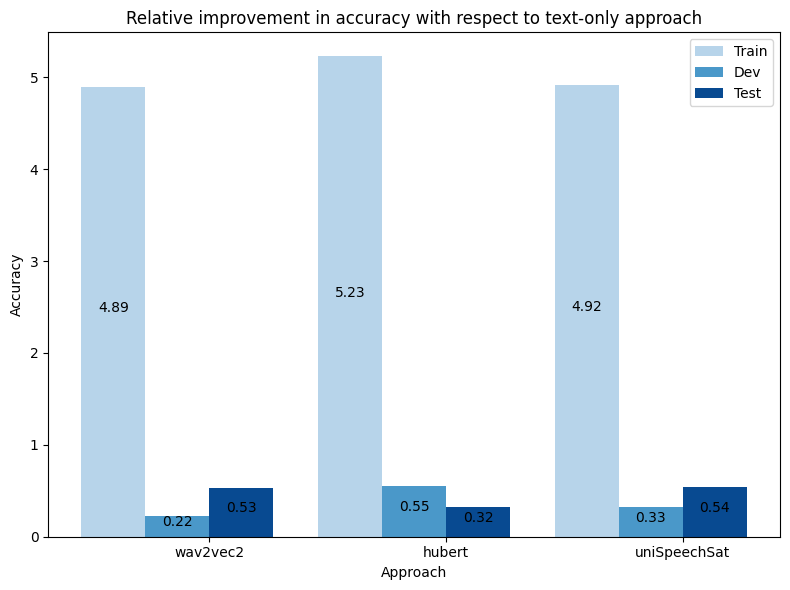

In [9]:
create_grouped_bar_plot_relative_improvement(['mean_train_accuracy_improvement', 'mean_dev_accuracy_improvement', 'mean_test_accuracy_improvement'],
                                            'Approach', 'Accuracy', 'Relative improvement in accuracy with respect to text-only approach',
                                            colormap='Blues')

### 4) User Request Score

#### 4.1) Absolute values

C:\Users\danie\AppData\Local\Temp\ipykernel_20168\1910469201.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap)


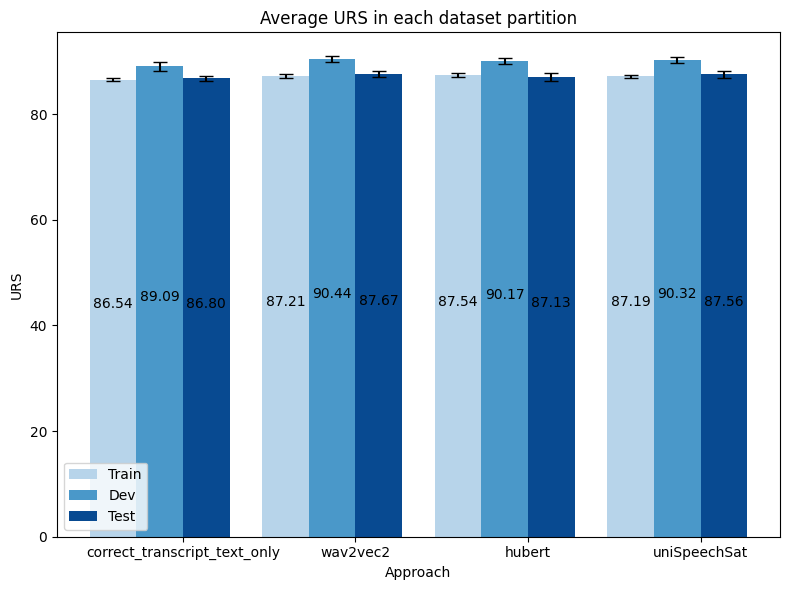

In [10]:
create_grouped_bar_plot(['mean_train_urs', 'mean_dev_urs', 'mean_test_urs'],
                        ['std_train_urs', 'std_dev_urs', 'std_test_urs'],
                        'Approach', 'URS', 'Average URS in each dataset partition',
                        colormap='Blues')

### 4.2) Relative improvement

C:\Users\danie\AppData\Local\Temp\ipykernel_20168\213888199.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap)


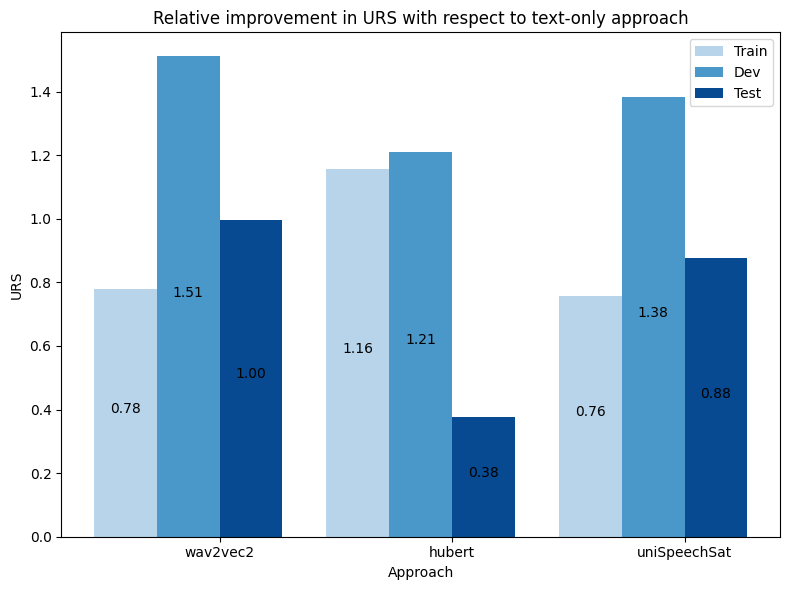

In [11]:
create_grouped_bar_plot_relative_improvement(['mean_train_urs_improvement', 'mean_dev_urs_improvement', 'mean_test_urs_improvement'],
                                            'Approach', 'URS', 'Relative improvement in URS with respect to text-only approach',
                                            colormap='Blues')